In [1]:
load('../../F21-ETALA/etala_utilities.sage')

# SMP exam fall 2019

## Problem 1:   Probability theory

In order to formalize the given information, let the event that a device has a given error be named according to the type of the error (A and B). Assuming the quality control and report of the error distribution are correct, the following is known:  
$ P\left(\bar A \cap \bar B\right) = 0.86 $  
$ P\left(A | A \cup B\right) = 0.42 $  
$ P\left(B| A \cup B\right) = 0.72 $  

### a)

The total percentage of units with errors can be found using the law of total probability:  
$ P\left(A \cup B \right) = 1 - P\left(\overline{A \cup B} \right) = 1 - P\left(\bar A \cap \bar B\right) = 1 - 0.86 = 0.14 $  
And so it can be concluded that __14% of the units have an error__.

### b)

Using the rule of multiplication and the fact that $A$ is a strict subset of $A \cup B$:  
$P\left(A\right) =  P\left(A \cap \left( A \cup B \right)\right) = P\left(A | A \cup B\right) P\left(A \cup B \right) = 0.42 \cdot 0.14 = 0.0588 $  
Showing that __5.9% of the units have a type A error__.

### c)

Using the inclusion exclusion principle, and finding the total probability of a unit with a type B error by the same method as for A:  
$ P\left(B\right) = P\left(B | A \cup B\right) P\left(A \cup B \right) = 0.72 \cdot 0.14 = 0.1008 $  
$ P\left( A \cap B \right) = P\left(A\right) + P\left(B\right) - P\left(A \cup B \right) = 0.0588 + 0.1008 - 0.14 = 0.0196 $  
It can be concluded that __2% of the units have both of the errors__.

### d)

From the definition of conditional probability:  
$ P\left(B | A \right) = \frac{P\left(A \cap B \right)}{P\left(A \right)} = \frac{0.0196}{0.0588} = \frac 1 3 \sim 0.33 $  
Meaning that __there's a  33.3% chance that a unit has a type B error if it's known that it has a type A error__.

## Problem 2:  Stochastic Variables

In [49]:
var('Pr_03')
X_table = [-1, 0, 1]
Y_table = [1, 2, 3, 4]
f_XY_table = [[1, 3,        2, 0],
              [0, 2, 20*Pr_03, 1],
              [4, 1,        1, 2]]
f_XY_table = [[e / 20 for e in r] for r in f_XY_table];

### a)

Using the law of total probability, the value of the final cell is determined so that the sum of the table is 1:  
$\begin{align} && P(X = 0 \cap Y = 3) + \frac{1 + 3 + 2 + 0 + 0 + 2 + 1 + 4 + 1 + 1 + 2}{20}  = 1 \\
\Leftrightarrow && P(X = 0 \cap Y = 3)  = 1 - \frac{1 + 3 + 2 + 0 + 0 + 2 + 1 + 4 + 1 + 1 + 2}{20}
\end{align}$

In [50]:
f_XY_table[1][2] = Pr_03 = solve(sum([sum(r) for r in f_XY_table]) == 1, Pr_03)[0].rhs()
show_var('Pr_03')

\text{Pr_03} = \frac{3}{20}

### b)

In order to determine the margin pmfs, for X and Y, the joint pmf table is collapsed by summing the rows and columns respectively:

In [51]:
f_X_table = [sum(row) for row in f_XY_table]; show_var()
f_Y_table = [sum(column) for column in zip(*f_XY_table)]; show_var()

\text{f_X_table} = \left[\frac{3}{10}, \frac{3}{10}, \frac{2}{5}\right]

\text{f_Y_table} = \left[\frac{1}{4}, \frac{3}{10}, \frac{3}{10}, \frac{3}{20}\right]

### c)

The mean is calculated from the marginal pmf's as follows:  
$ EX = \sum_x x\,f(x) $

In [1]:
EX = sum([x*fx for x, fx in zip(X_table, f_X_table)]); show_var()
EY = sum([y*fy for y, fy in zip(Y_table, f_Y_table)]); show_var()

NameError: name 'X_table' is not defined

### d)

Using the definition of conditional probability, along with the fact that the probability of a variable fulfill some condition can be found by summing the pmf for all values meeting the condigtion (since the CDF hasn't been determined.

In [53]:
PR_le0ge3 = sum([sum(r[2:]) for r in f_XY_table[:2]])/sum([sum(r[2:]) for r in f_XY_table]); show_var()

\text{PR_le0ge3} = \frac{2}{3}

## Problem 3:  Stochastic processes

### a)

The realizations are created using the relevant distribution classes in scipy.stats:

<IPython.core.display.Javascript object>


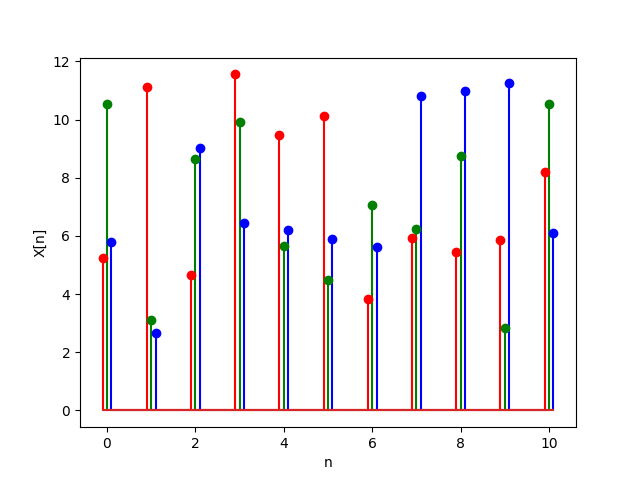

In [58]:
%matplotlib notebook
import scipy.stats
import matplotlib.pyplot as plt

## Function to create a realization of a given length
def realization_of_Yn(sample_len):
    X = scipy.stats.uniform.rvs(1, 3, sample_len)
    W = scipy.stats.norm.rvs(0, 0.5, sample_len)
    return [3*X[n] + W[n] for n in range(sample_len)]

num_realizations = 3
n_ = range(11)
realizations = [realization_of_Yn(len(n_)) for _ in range(num_realizations)]

offset = 0.1
fmt = ['r', 'g', 'b']
fig, ax = plt.subplots()
for i in range(num_realizations):
    ax.stem([-offset + i*offset + n for n in _n], realizations[i], fmt[i], fmt[i]+'o')
    ax.set_xlabel('n')
    ax.set_ylabel('X[n]')
fig.show()

### b)

The mean of the process is found algebraically using the rules for expectations:  
$ E(Y[n]) = E(3X[n] + W[n]) =  3E(X[n]) + E(W[n])$  
W is parameterized by the mean, but the mean of X has to be calculated:  
$ E(\mathcal U(a, b)) = \frac{b + a}{2}$
Substituting in the values, this yields:  
$ E(Y[n]) = 3\cdot \frac{1 + 3}{2} + 0 = 6 $

### c)

Since the process is in $\Bbb R$ and is WSS the ensemble auto correlation can be determined for some $\tau$ as:  
$R_{XX}(\tau) = E[X(t)X(t+\tau)] $

In [ ]:
def autocorralation_Yn(tau):
    

## Problem 4:  Statistics

In [59]:
weight_data = [30.09, 28.78, 31.01, 27.02, 30.11, 29.35, 28.37, 29.65, 27.71, 30.58, 28.06, 29.04]

### a)

The QQ plot is rendered using the scipy.stats.probplot:

<IPython.core.display.Javascript object>


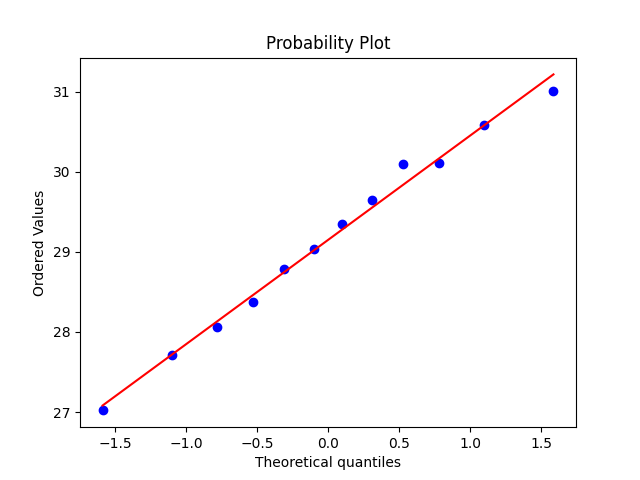

\text{fit} = \left(1.3013800062371312, 29.147499999999997, 0.9956194303445527\right)

In [62]:
%matplotlib notebook
import scipy.stats
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
_, fit = scipy.stats.probplot(weight_data, plot=ax); show_var('fit')
fig.show()

Since the QQ plot exibits a strong linear relation ($R^2 = 0.996$), the meassurements appear normally distributed.

### b)

Since the sample size is small, and the variance unknown, a student-t-test is chosen.

### c)

To test that the weight of the product matches specification, the null hypothesis will be that the population mean equals the specified weight:  
$H_0\text{:}\quad \hat \mu = \mu_0 = 30$  
$H_1\text{:}\quad \hat \mu \ne \mu_0 = 30$  

### d)

In order to determine the empirical mean and variance, the following formulas are used:  
$ \hat \mu = \frac 1 n \sum_{i=1}^n x_i $  
$ \hat \sigma ^2 = \frac 1 {n-1} \sum_{i=1}^n{(x_i - \hat \mu)^2} $  

In [68]:
weight_mean = sum(weight_data)/len(weight_data); show_var()
weight_variance = sum([(w-weight_mean)^2 for w in weight_data]) / (len(weight_data) - 1); show_var()

\text{weight_mean} = 29.1475000000000

\text{weight_variance} = 1.46869318181818

### e)

Here the test statistic  
$t = \frac{\hat \mu - \mu_0} {\hat \sigma/\sqrt(n)} $  
is first found, and the p-val is found as :  
$pval = 2\left(1-t_{cdf}\left(|t|, n-2\right)\right)$  

In [71]:
import scipy.stats
t = (weight_mean-30)/(sqrt(weight_variance)/sqrt(len(weight_data))); show_var()
pval = 2*(1-scipy.stats.t.cdf(float(abs(t)), len(weight_data)-2)); show_var()

\text{t} = -1.40688579265133 \, \sqrt{3} \sim -2.44

\text{pval} = 0.03504040420813581 \sim 0.0350

Since the p_value is < 0.05, the null hypothesis can be rejected with a significance level of 5%

### f)

Here the range of the confidence interval ($t_0$) is calculated from the reverse cdf (ppf), the upper and lower bounds are then calculated by adding/subtracting $t_0$.

In [76]:
significance = 0.05
t_0 = scipy.stats.t.ppf(1-significance/2, len(weight_data)-1); show_var()
bounds = (weight_mean - t_0*sqrt(weight_variance/len(weight_data)), 
          weight_mean + t_0*sqrt(weight_variance/len(weight_data))); 
show_var(approx=False)

\text{t_0} = 2.200985160082949 \sim 2.20

KeyError: 'weight_mean + t_0*sqrt(weight_variance/len(weight_data))); show_var(approx'

This means that 95% of the product is expected to be within this interval